In [28]:
import seaborn
import sklearn.cluster
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pylab as pl
from IPython.display import display
%matplotlib inline

In [2]:
df = pd.read_csv('NYCTicketSummonses.csv', index_col = 0).transpose()

In [3]:
df.columns = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015']
df.head()

,Y2011,Y2012,Y2013,Y2014,Y2015
Backing_Unsafely,1349.0,1217.0,1569.0,2022.0,1369.0
Brake_Lights,27818.0,30283.0,27060.0,22700.0,13927.0
Bus_Lane,7777.0,7756.0,5472.0,2745.0,2892.0
Cell_Phone,162407.0,141816.0,126422.0,106503.0,84630.0
Commercial_Veh_Pkwy,1658.0,864.0,1063.0,1430.0,1618.0


In [4]:
df['PreVZ_Mean'] = (df['Y2011'] + df['Y2012'] + df['Y2013']) / 3
df['PostVZ_Mean'] = (df['Y2014'] + df['Y2015']) / 2
df.head()
df.shape

(39, 7)

In [5]:
df['PercentChange'] = (df['PostVZ_Mean'] - df['PreVZ_Mean']) / df['PreVZ_Mean']
df.dropna(axis = 0, how = 'any', inplace = True)
df.drop(df.index[[-1, -2, -3, -12]], inplace=True)
df.head()
df.shape

(34, 8)

(1.3962541118004774, 0.0046831344666262362)


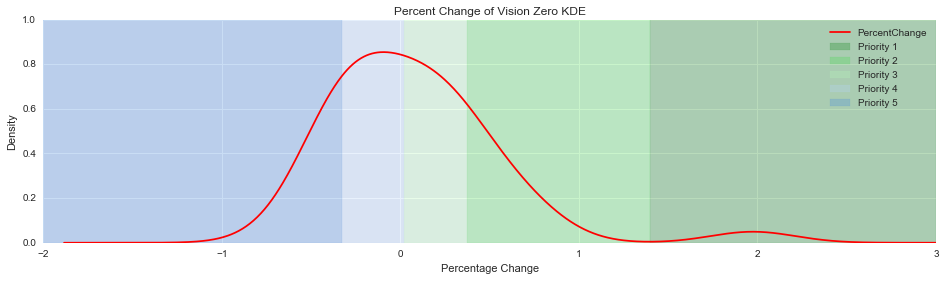

In [27]:
fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))

# Plot KDE of percent change.
ax1 =  df.PercentChange.plot.kde(c = 'r')
ax1.axis([-2, 3, 0, 1])

# Get local minima where x[1:2]
x = [(i,j) for (i,j) in zip(ax1.get_children()[0]._x,
                            ax1.get_children()[0]._y) if i > 1 and i < 2]
minima = min(x, key = lambda t: t[1])

# Plot priority ranges on KDE
pl.axvspan(1.3962541118, 3, color = '#17891F', alpha = 0.3, zorder = 1, label = 'Priority 1')
pl.axvspan(0.372000488296, 1.3962541118, color = '#4CDC55', alpha = 0.3, zorder = 1, label = 'Priority 2')
pl.axvspan(0.0214814108441, 0.372000488296, color = '#B4F6B9', alpha = 0.3, zorder = 1, label = 'Priority 3')
pl.axvspan(-0.329037666608, 0.0214814108441, color = '#B4D3F6', alpha = 0.3, zorder = 1, label = 'Priority 4')
pl.axvspan(-2, -0.329037666608, color = '#4C8FDC', alpha = 0.3, zorder = 1, label = 'Priority 5')
ax1.set_xlabel('Percentage Change')
ax1.set_title('Percent Change of Vision Zero KDE')
ax1.legend()

print minima

In [7]:
df['p'] = df['PercentChange'] > minima[0]
df.sort_values('p', axis = 0, ascending = False, inplace = True)
df.head(1)

,Y2011,Y2012,Y2013,Y2014,Y2015,PreVZ_Mean,PostVZ_Mean,PercentChange,p
Not_Giving_RofW_to_Pedes,10448.0,11698.0,14888.0,33577.0,39853.0,12344.666667,36715.0,1.974159,True


In [8]:
dist = [(i, j) for (i, j) in zip(ax1.get_children()[0]._x,
                            ax1.get_children()[0]._y) if i > minima[0]]
y = [j for (i, j) in dist]
x = [i for (i, j) in dist]

In [9]:
query = df['p'] == False
df1 = df[query]
summary = df1.PercentChange.describe()
print summary[1] - summary[2]
print summary[1]
print summary[1] + summary[2]
print minima[0]

-0.329037666608
0.0214814108441
0.372000488296
1.3962541118


In [10]:
priority = []
for row in df['PercentChange']:
    if row < summary[1] - summary[2]:
        priority.append(5)
    elif row > summary[1] - summary[2] and row < summary[1]:
        priority.append(4)
    elif row > summary[1] and row < summary[1] + summary[2]:
        priority.append(3)
    elif row > summary[1] + summary[2] and row < minima[0]:
        priority.append(2)
    elif row >= minima[0]:
        priority.append(1)
df['Priority'] = priority
df.sort_values('Priority', axis = 0, ascending = True, inplace = True)
df.drop('p', 1, inplace = True)
df

,Y2011,Y2012,Y2013,Y2014,Y2015,PreVZ_Mean,PostVZ_Mean,PercentChange,Priority
Not_Giving_RofW_to_Pedes,10448.0,11698.0,14888.0,33577.0,39853.0,12344.666667,36715.0,1.974159,1
Fail_to_Signal,13879.0,14208.0,18588.0,22088.0,24376.0,15558.333333,23232.0,0.493219,2
Speeding,76493.0,71305.0,83202.0,117767.0,134438.0,77000.000000,126102.5,0.637695,2
School_Bus_Passing_Stopped,2739.0,3312.0,1371.0,5428.0,3298.0,2474.000000,4363.0,0.763541,2
Not_Giving_RofW_to_Veh,1951.0,2139.0,2335.0,3365.0,3696.0,2141.666667,3530.5,0.648482,2
Unsafe_Lane_Change,4836.0,4203.0,4563.0,5880.0,6408.0,4534.000000,6144.0,0.355095,3
Other_Movers,50170.0,60274.0,69088.0,69979.0,75485.0,59844.000000,72732.0,0.215360,3
Commercial_Veh_Pkwy,1658.0,864.0,1063.0,1430.0,1618.0,1195.000000,1524.0,0.275314,3
Disobey_Sign,128317.0,129926.0,137250.0,152617.0,165389.0,131831.000000,159003.0,0.206112,3
U_Turn,3924.0,3912.0,4921.0,6930.0,4311.0,4252.333333,5620.5,0.321745,3
